First exercise: count the number of lines in Python for each file

In [2]:
import os
print os.getcwd()

/root/anaconda


1-st approach

In [ ]:
import time
filename1='/media/sf_VM_share/bookings.csv'
filename2='/media/sf_VM_share/searches.csv'
def linecount_1(filename):
    return len(open(filename).readlines(  ))

print("Starting")
start = time.clock(  )
print linecount_1(filename1)
stend = time.clock(  )
thetime = stend-start
print 'Time parsing', filename1, thetime

start = time.clock(  )
#print linecount_1(filename2)
stend = time.clock(  )
thetime = stend-start
print 'Time parsing', filename2, thetime

2-nd approach

In [1]:
import time
filename1='/media/sf_VM_share/bookings.csv'
filename2='/media/sf_VM_share/searches.csv'
def linecount_2(filename):
    n=10
    count = 0
    for line in open(filename).xreadlines(  ): count += 1
    return count

print("Starting")
start = time.clock(  )
print linecount_2(filename1)
stend = time.clock(  )
thetime = stend-start
print 'Time parsing', filename1, thetime

start = time.clock(  )
print linecount_2(filename2)
stend = time.clock(  )
thetime = stend-start
print 'Time parsing', filename2, thetime

Starting
10000011
Time parsing /root/bookings.csv 3.594547
20390199
Time parsing /root/searches.csv 4.463977


3-d approach

In [2]:
import time
filename1='/media/sf_VM_share/bookings.csv'
filename2='/media/sf_VM_share/searches.csv'
def linecount_3(filename):
    count = 0
    thefile = open(filename)
    while 1:
        buffer = thefile.read(65536)
        if not buffer: break
        count += buffer.count('\n')
    return count
print("Starting")
start = time.clock(  )
print linecount_3(filename1)
stend = time.clock(  )
thetime = stend-start
print 'Time ', filename1, thetime

start = time.clock(  )
print linecount_3(filename2)
stend = time.clock(  )
thetime = stend-start
print 'Time ', filename2, thetime

Starting
10000011
Time  /root/bookings.csv 3.954198
20390198
Time  /root/searches.csv 3.610474


4-th approach

In [ ]:
from pandas import DataFrame, read_csv
import pandas as pd 
import time
filename1='/media/sf_VM_share/bookings.csv'
filename2='/media/sf_VM_share/searches.csv'

def linecount_4(filename):
    return pd.read_csv(filename, sep="^" ).shape[0]+1

print("Starting")
start = time.clock(  )    
print linecount_4(filename1)
stend = time.clock(  )
thetime = stend-start
print 'Time ',filename1, thetime

start = time.clock(  )    
print linecount_4(filename2)
stend = time.clock(  )
thetime = stend-start
print 'Time ',filename2, thetime

2-nd task

In [28]:
import numpy as np
import pandas as pd
import time
filename='/media/sf_VM_share/bookings.csv'
data= pd.read_csv(filename, sep='^', nrows=1)
#print map(str.strip, data.columns)
v=dict(fields= ['pax', 'arr_port'])
print v
DD=pd.DataFrame()
for chunk in pd.read_table(filename, sep="^", chunksize=5000):
    chunk.columns=map(str.strip, chunk.columns)
    DD=DD.append(chunk.reindex(columns = v['fields'], copy = False)[['arr_port','pax']], ignore_index =True)

D1= DD.groupby("arr_port")["pax"].sum().order(ascending=False)[:10]

D2=pd.DataFrame(D1)
D2.index=map(str.strip,D2.index)
D3={'arr_port':D2.index,'pax':D2.pax}
df = pd.DataFrame(D3)

print df
D2=pd.DataFrame(index=map(str.strip,D1.index),data=map(int,D1))



df.to_csv('/media/sf_VM_share/dict2.csv', sep=',', index=False)
D2.to_json('/media/sf_VM_share/dict2.json')

{'fields': ['pax', 'arr_port']}
Index([u'LHR     ', u'MCO     ', u'LAX     ', u'LAS     ', u'JFK     ',
       u'CDG     ', u'BKK     ', u'MIA     ', u'SFO     ', u'DXB     '],
      dtype='object', name=u'arr_port')
<class 'pandas.core.frame.DataFrame'>
    arr_port    pax
LHR      LHR  88809
MCO      MCO  70930
LAX      LAX  70530
LAS      LAS  69630
JFK      JFK  66270
CDG      CDG  64490
BKK      BKK  59460
MIA      MIA  58150
SFO      SFO  58000
DXB      DXB  55590


Find airports in Geobases

In [29]:
import sys
sys.path.append('/home/anna/.local/lib/python2.7/site-packages/python_geohash-0.8.5-py2.7-linux-x86_64.egg')
sys.path.append('/home/anna/.local/lib/python2.7/site-packages/Fuzzy-1.1-py2.7-linux-x86_64.egg')
sys.path.append('/home/anna/.local/lib/python2.7/site-packages/GeoBases-5.0.16-py2.7.egg')
sys.path.append('/home/anna/.local/lib/python2.7/site-packages/python_Levenshtein-0.12.0-py2.7-linux-x86_64.egg')
import GeoBases
from GeoBases import GeoBase
geo_o = GeoBase(data='ori_por', verbose=False)
res=pd.read_csv('/home/anna/Music/Documents/Amadeus/dict2.csv')
cities=[]
for x in res['arr_port']:
    cities.append(geo_o.get(str.strip(x), 'city_name_ascii'))

res['city']=pd.Series(cities, index=res.index)
res= res[['arr_port','pax','city']]
print res

  arr_port    pax           city
0      LHR  88809         London
1      MCO  70930        Orlando
2      LAX  70530    Los Angeles
3      LAS  69630      Las Vegas
4      JFK  66270  New York City
5      CDG  64490          Paris
6      BKK  59460        Bangkok
7      MIA  58150          Miami
8      SFO  58000  San Francisco
9      DXB  55590          Dubai


Plot history of searches for 'MAD', 'BCN', 'AGP'

start
Time for data read 129.75971
ok
              AGP    BCN    MAD
YearMonth                      
2013-01-01   9633  29469  24258
2013-02-01   8379  28329  22800
2013-03-01  10659  30552  24681
2013-04-01   8265  31236  25251
2013-05-01  10830  28728  26334
2013-06-01   7923  26505  22800
2013-07-01   8892  29241  22971
2013-08-01   7866  27075  21831
2013-09-01   8151  23427  21147
2013-10-01   6499  20276  22294
2013-11-01   6384  19824  20272
2013-12-01   3696  15400  14504


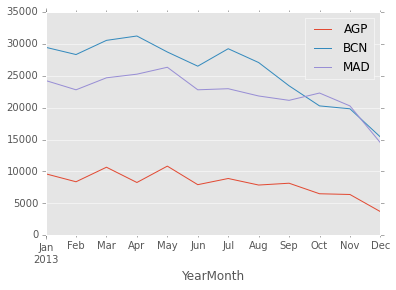

In [30]:
import pandas as pd
from pandas import *
filename='/media/sf_VM_share/searches.csv'
#filename='Documents/test_files/3.csv'
import matplotlib.pyplot as plt
import time
import matplotlib
from matplotlib.dates import DateFormatter, YearLocator, MonthLocator
plt.style.use('ggplot')
%matplotlib inline
LARGE_FILE = filename
CHUNKSIZE = 10000 # processing 100,000 rows at a time

def process_frame(df, dest):
    return  df.loc[df['Destination'].isin(dest)][['Destination','Date']]

reader = pd.read_csv(LARGE_FILE, chunksize=CHUNKSIZE, sep='^')

Ndf=pd.DataFrame() 
Pdf=pd.DataFrame()
Adf=pd.DataFrame()
DD=pd.DataFrame()
r= Ndf.empty
dest=['MAD', 'BCN', 'AGP']
print 'start'
start = time.clock(  )
for df in reader:
    DD=DD.append(process_frame(df, dest), ignore_index =True)

end = time.clock(  )
print 'Time for data read',end-start
DD['Date']=pd.to_datetime(DD['Date'],format='%Y-%m-%d')
DD['YearMonth'] = DD['Date'].map(lambda x: str('{year}-{month}'.format(year=x.year,month=x.month)))

DD['YearMonth']=pd.to_datetime(DD['YearMonth'],format='%Y-%m')
DD.index=DD['Destination']

print 'ok'
ts1=DD.loc[DD['Destination']==dest[0]].groupby(['YearMonth'])['Destination'].agg('count')
ts2=DD.loc[DD['Destination']==dest[1]].groupby(['YearMonth'])['Destination'].agg('count')
ts3=DD.loc[DD['Destination']==dest[2]].groupby(['YearMonth'])['Destination'].agg('count')
data = {dest[0] : ts1,dest[1] : ts2, dest[2] : ts3}

df = pd.DataFrame(data)
print df
df.plot()


1   2013  AGP     9633
2   2013  AGP     8379
3   2013  AGP    10659
4   2013  AGP     8265
5   2013  AGP    10830
6   2013  AGP     7923
7   2013  AGP     8892
8   2013  AGP     7866
9   2013  AGP     8151
10  2013  AGP     6499
11  2013  AGP     6384
12  2013  AGP     3696
dtype: int64


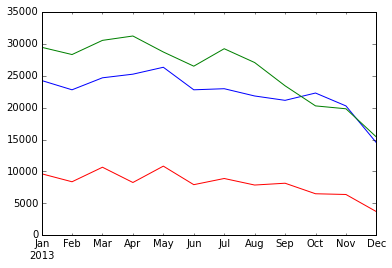

In [9]:
import pandas as pd
from pandas import *
filename='/media/sf_VM_share/searches.csv'
#filename='Documents/test_files/2.csv'
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
LARGE_FILE = filename
CHUNKSIZE = 100000 

def process_frame(df, dest):
        return df.loc[df['Destination'] == dest][['Destination','Date']]

#reader = pd.read_table(LARGE_FILE, chunksize=CHUNKSIZE )
reader = pd.read_csv(LARGE_FILE, chunksize=CHUNKSIZE, sep='^')#, index_col='Destination' )

Ndf=pd.DataFrame() 
Pdf=pd.DataFrame()
Adf=pd.DataFrame()
r= Ndf.empty
for df in reader:
    if Ndf.empty:
        Ndf=process_frame(df, 'MAD')
        Pdf=process_frame(df, 'BCN') 
        Adf=process_frame(df, 'AGP') 
         #print Ndf.columns
    else:
        Ndf=Ndf.append(process_frame(df, 'MAD'), ignore_index =True)
        Pdf=Pdf.append(process_frame(df, 'BCN'), ignore_index =True)
        Adf=Adf.append(process_frame(df, 'AGP'), ignore_index =True)

        
Ndf['Date']=pd.to_datetime(Ndf['Date'], unit='ms')
Pdf['Date']=pd.to_datetime(Pdf['Date'], unit='ms')

Ndf['Date']=pd.to_datetime(Ndf['Date'],format='%Y-%m-%d')
Pdf['Date']=pd.to_datetime(Pdf['Date'],format='%Y-%m-%d')
Adf['Date']=pd.to_datetime(Adf['Date'],format='%Y-%m-%d')
Ndf.index=Ndf['Date']
Pdf.index=Pdf['Date']
Adf.index=Adf['Date']

print pd.groupby(Adf,by=[Adf.index.month, Adf.index.year], as_index=True)['Destination'].value_counts()
ts= TimeSeries(pd.groupby(Ndf,by=[Ndf.index.month, Ndf.index.year], as_index=True)['Destination'].value_counts().tolist(), period_range('2013-01', periods=12, freq='M'))
ts.plot()
ts= TimeSeries(pd.groupby(Pdf,by=[Pdf.index.month, Pdf.index.year], as_index=True)['Destination'].value_counts().tolist(), period_range('2013-01', periods=12, freq='M'))
ts.plot()
ts= TimeSeries(pd.groupby(Adf,by=[Adf.index.month, Adf.index.year], as_index=True)['Destination'].value_counts().tolist(), period_range('2013-01', periods=12, freq='M'))
ts.plot()



Data merging using HDFS

In [ ]:
import pandas as pd
filename1='/media/sf_VM_share/bookings.csv'
filename2='/media/sf_VM_share/searches.csv'
import gc
gc.collect()
A.close()
B.close()
A = pd.HDFStore('Aw.h5', 'w')
B = pd.HDFStore('Bw.h5', 'w')
store = pd.HDFStore('mystoree.h5')


D2=pd.read_csv(filename2, sep="^", chunksize=100000,usecols=['Date', 'Origin', 'Destination'])

k=0
objk=['k1','k2','k3','k4','k5','k6', 'k7', 'k8', 'k9', 'k10', 'k11', 'k12', 'k13', 'k14', 'k15', 'k16',
      'k17', 'k18', 'k19', 'k120', 'k121', 'k122', 'k123', 'k124']

for df in D2:
    print df.head(5)
    B.append('df', df, min_itemsize={ 'Date' : 100000,'Origin' : 100000,'Destination' : 100000 })#,format='table', data_columns=True)
    k=k+1

D1=pd.read_csv(filename1, sep="^", usecols=[0,9,12])#'act_date', 'dep_port', 'arr_port'])
D1.columns=['Date_booking', 'Origin', 'Destination']

A.put('df',pd.read_csv(filename1, sep="^", usecols=[0,9,12]) )
#B.put('df',pd.read_csv(filename2, sep="^", usecols=['Date', 'Origin', 'Destination']) )
nrows_a = A.get_storer('df').nrows
nrows_b = B.get_storer('df').nrows
a_chunk_size = 10000
b_chunk_size = 10000

def merge_a_b(a,b):
    a.columns=['Date_booking', 'Origin', 'Destination']
    return pd.merge(a, b, on=['Origin', 'Destination'], how='inner')
    # function that returns an operation on passed
    # frames a and b
    # could be a merge, join, concat, or other operation that 
    # results in a single frame


for a in xrange(int(nrows_a / a_chunk_size) + 1):

    a_start_i = a * a_chunk_size
    a_stop_i  = min((a + 1) * a_chunk_size, nrows_a)

    a = A.select('df', start = a_start_i, stop = a_stop_i)

    for b in xrange(int(nrows_b / b_chunk_size) + 1):

        b_start_i = b * b_chunk_size
        b_stop_i = min((b + 1) * b_chunk_size, nrows_b)

        b = B.select('df', start = b_start_i, stop = b_stop_i)

        # this is your result store
        m = merge_a_b(a, b)
        print m.head(5)
        if len(m):
            store.append('df_result', m)